# Medical Data Analysis



In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_context('paper')

In [375]:
d = pd.read_csv("med.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [376]:
d['cholesterol'][5], d['gluc'][5], d['cholesterol'][6], d['gluc'][6]

(2, 2, 3, 1)

In [377]:
bmi = d['weight']/((d['height']/100)**2)
d['overweight'] = bmi.apply(lambda x : int(x>25))

In [378]:
d['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [379]:
d['cholesterol'] = d['cholesterol'].apply(lambda x : int(x>1))

d['gluc'] = d['gluc'].apply(lambda x : int(x>1))

In [380]:
d['cholesterol'][5], d['gluc'][5], d['cholesterol'][6], d['gluc'][6]

(1, 1, 1, 0)

In [381]:
d

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [382]:
d_new = pd.melt(d, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],var_name='parameters')
d_new

,cardio,parameters,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [383]:
d_new['total'] = 0
d_new = d_new.groupby(['cardio','parameters','value'], as_index=False).count()
d_new

,cardio,parameters,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


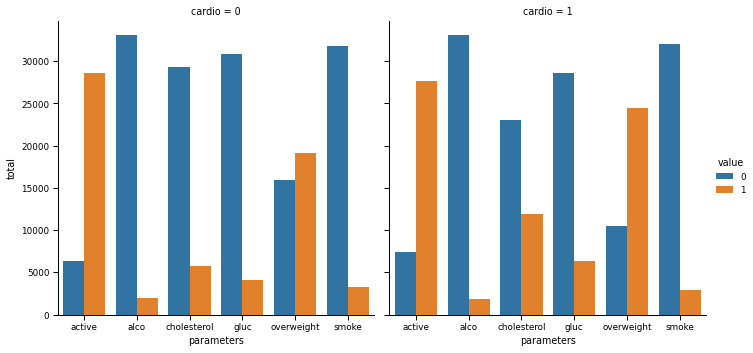

In [441]:
g = sns.catplot(x = 'parameters',y = 'total',col = 'cardio',hue = 'value',kind = 'bar',data = d_new)
fig = g.fig
#fig

In [385]:
d.drop(d[d['ap_lo']>d['ap_hi']].index,inplace = True)
d

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [386]:
d.drop(d[(d['height']<d['height'].quantile(0.025))].index, inplace = True)
d

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [387]:
d.drop(d[d['height']>d['height'].quantile(0.975)].index, inplace = True)
d

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [388]:
d.drop(d[d['weight']<d['weight'].quantile(0.025)].index, inplace = True)
d

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [389]:
d.drop(d[d['weight']>d['weight'].quantile(0.975)].index, inplace = True)
d

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


<AxesSubplot:>

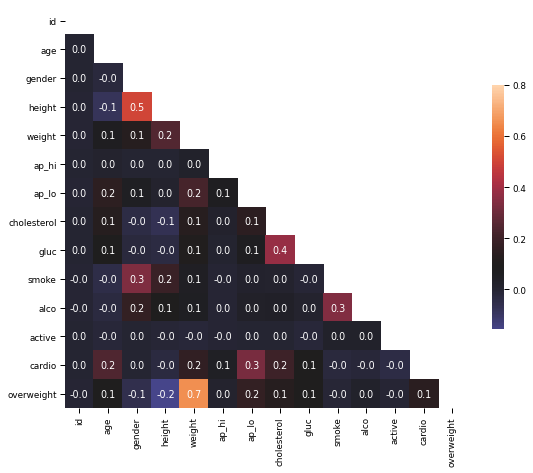

In [443]:
corr = d.corr()
mask = np.triu(corr)
fig1,ax = plt.subplots(figsize = (9,9))
sns.heatmap(d.corr(), cmap = 'icefire',annot=True, fmt = '.1f',vmax = 0.8,center = 0.09, mask = mask, square = True,cbar_kws = {'shrink' : 0.5})
#plt.tight_layout()